<a href="https://colab.research.google.com/github/YagyanshB/time-series-forecasting/blob/main/arima_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')

In [4]:
df.head(10)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [5]:
# steps to carry out

# visualise the time series data
# make the time series data stationary
# plot the correlation and autocorrelation charts
# construct the arima or seasonal arima model
# use the model to make predictions

In [6]:
df.tail(10)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
97,1972-02,3564.0
98,1972-03,4577.0
99,1972-04,4788.0
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
df.isnull().sum()

,0
Month,1
Perrin Freres monthly champagne sales millions ?64-?72,2


In [8]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [9]:
# data cleaning

df.columns = ["Month", "Sales"]
df.head(10)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [10]:
# dropping rows with null values from our dataset

df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
Month,0
Sales,0


In [12]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [13]:
df.shape

(105, 2)

In [14]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [15]:
# convert month to date-time format

df['Month'] = pd.to_datetime(df['Month'])

In [16]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [17]:
df.tail()

,Month,Sales
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


In [18]:
df.set_index('Month', inplace=True)

In [19]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


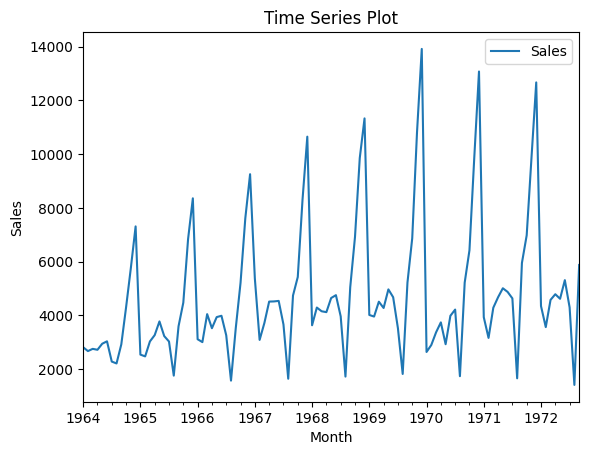

In [22]:
df.plot()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Time Series Plot')
plt.show()

In [29]:
# The Dickey-Fuller test is a statistical test used to determine whether a time series is stationary
# by checking for the presence of a "unit root,"
# essentially indicating if the series has a random walk component, making it non-stationary

In [23]:
# testing if the data is stationary

from statsmodels.tsa.stattools import adfuller

In [24]:
test_result = adfuller(df['Sales'])

In [25]:
# h0 = it is not stationary
# h1 = it is stationary

In [30]:
def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print('Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary')
  else:
    print('Weak evidence against the null hypothesis (H0), time series has a unit root, indicating it is non-stationary')

In [31]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against the null hypothesis (H0), time series has a unit root, indicating it is non-stationary


In [32]:
# the most important part is the p value

In [33]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [35]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

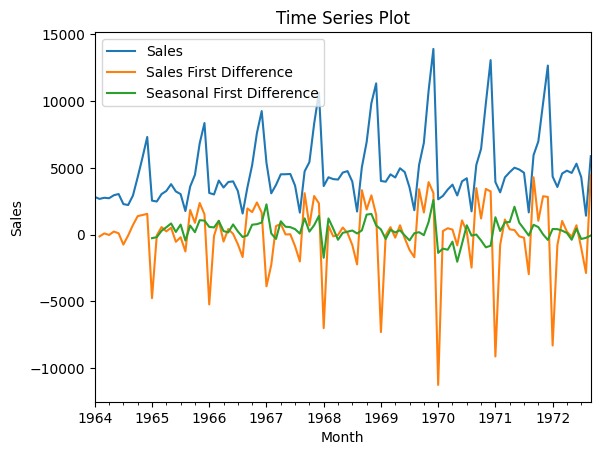

In [39]:
df.plot()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Time Series Plot')
plt.show()

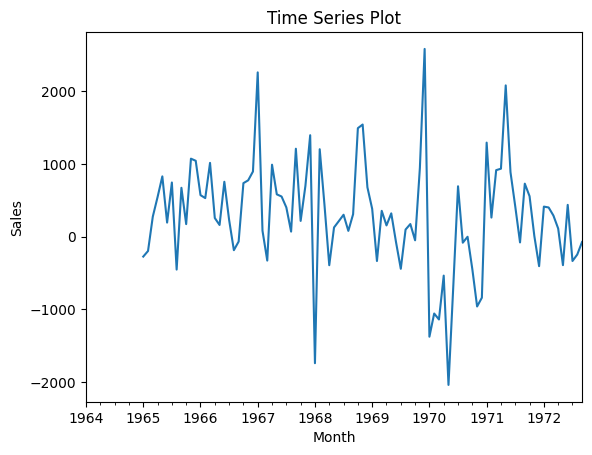

In [40]:
df['Seasonal First Difference'].plot()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Time Series Plot')
plt.show()

In [41]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary


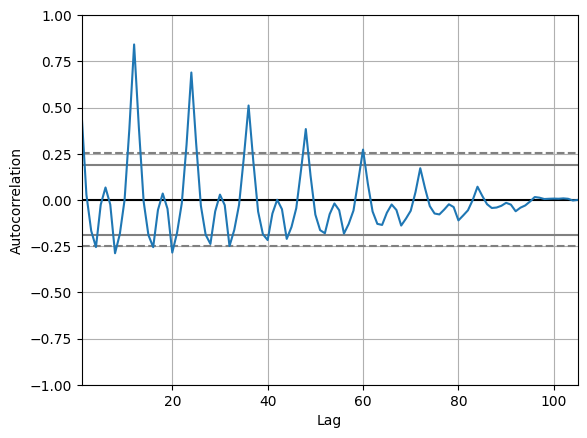

In [45]:
from enum import auto
# auto regressive model

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

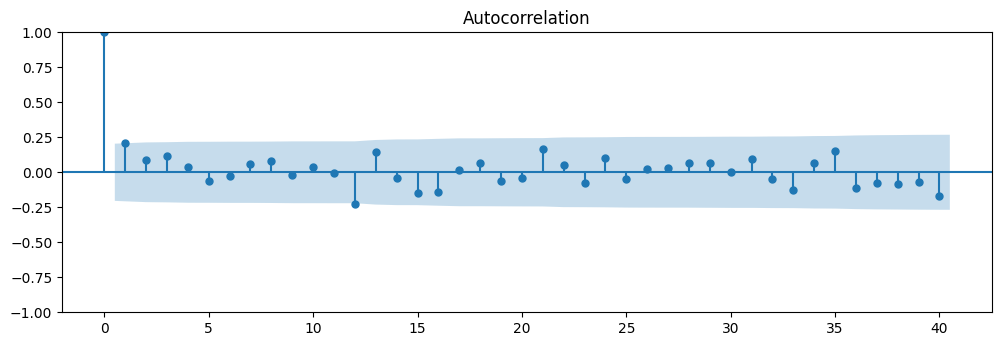

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)

In [49]:
# p specifies the AR model lags
# d specifies differencing
# q specifies moving averaging lags